# Loading up the required data:

In [2]:
import pyspark as pys

# using the urls to add files into spark
data_sample_url = "https://raw.githubusercontent.com/EQWorks/ws-data-spark/master/data/DataSample.csv"
poi_list_url = "https://raw.githubusercontent.com/EQWorks/ws-data-spark/master/data/POIList.csv"

# create an instance of the internal spark engine
sc0 = pys.SparkContext()

In [3]:
# load the files into spark
sc0.addFile(data_sample_url)
sc0.addFile(poi_list_url)

# Looking at the data:

In [4]:
# data manipulation by means of an sql engine instance that connects to the datasets
sqlc = pys.sql.SQLContext(sc0)

# reading the data from the spark system by using sql dataframes
data_sample = sqlc.read.csv(pys.SparkFiles.get("DataSample.csv"), header=True, inferSchema=True)
poi_list = sqlc.read.csv(pys.SparkFiles.get("POIList.csv"), header=True, inferSchema=True)

# looking at the structure of each dataset
data_sample.printSchema()
poi_list.printSchema()

root
 |-- _ID: integer (nullable = true)
 |--  TimeSt: timestamp (nullable = true)
 |-- Country: string (nullable = true)
 |-- Province: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)

root
 |-- POIID: string (nullable = true)
 |--  Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)



In [5]:
# viewing DataSample.csv
data_sample.show(10, truncate=False)

+-------+-----------------------+-------+--------+---------+--------+---------+
|_ID    | TimeSt                |Country|Province|City     |Latitude|Longitude|
+-------+-----------------------+-------+--------+---------+--------+---------+
|4516516|2017-06-21 00:00:00.143|CA     |ON      |Waterloo |43.49347|-80.49123|
|4516547|2017-06-21 18:00:00.193|CA     |ON      |London   |42.9399 |-81.2709 |
|4516550|2017-06-21 15:00:00.287|CA     |ON      |Guelph   |43.5776 |-80.2201 |
|4516600|2017-06-21 15:00:00.307|CA     |ON      |Stratford|43.3716 |-80.9773 |
|4516613|2017-06-21 15:00:00.497|CA     |ON      |Stratford|43.3716 |-80.9773 |
|4516693|2017-06-21 14:00:00.597|CA     |ON      |Kitchener|43.4381 |-80.5099 |
|4516771|2017-06-21 10:00:00.873|CA     |ON      |Sarnia   |42.961  |-82.373  |
|4516831|2017-06-21 12:00:00.95 |CA     |ON      |London   |43.0091 |-81.1765 |
|4516915|2017-06-21 15:00:01.31 |CA     |ON      |London   |43.0091 |-81.1765 |
|4516953|2017-06-21 16:00:01.7  |CA     

In [6]:
# viewing POIList.csv
poi_list.show(2, truncate=False)

+-----+---------+-----------+
|POIID| Latitude|Longitude  |
+-----+---------+-----------+
|POI1 |53.546167|-113.485734|
|POI2 |53.546167|-113.485734|
+-----+---------+-----------+
only showing top 2 rows



In [7]:
# looking at the shape of the datasets
def pyspark_shape(self):
    return (self.count(), len(self.columns))

print(pyspark_shape(data_sample))
print(pyspark_shape(poi_list))

(22025, 7)
(4, 3)


# Cleaning the data

In [ ]:
'''
task 1: cleaning the data:

!! the data is cleaned by removing rows that have repeated timest, latitude and longitude data !!

1a: filtering out common timest data

1b: filtering out common geospatial data
    - latitude
    - longitude
    
'''

In [ ]:
'''
# cleaning each feature separately

clean_tim = data_sample.select(" TimeSt").distinct().collect()
print(len(clean_tim))

clean_lat = data_sample.select("Latitude").distinct().collect()
print(len(clean_lat))

clean_lon = data_sample.select("Latitude", "Longitude").distinct().collect()
len(clean_lon)
'''

In [ ]:
'''# function to filter a dataset
def apply_filter(the_rdd, filter_features):
    # the_rdd: the spark dataframe to be used
    # filter_features: the features that the_rdd will be filtered on
    
    # get the unique data based on specific features in the dataset
    filtered = the_rdd.select(filter_features).distinct().collect()
    print("No. of columns after filter: ", len(cleaned))
    return cleaned

# function to clean the data based on the applied filter
def cleaned_filter(the_rdd, the_cleaned):
    # the_rdd: the spark dataframe to be used
    # the_cleaned: the clean data from the apply_filter function
    
    # using the unique data to filter out the rows that are not needed
    filtered = []

    # !! the following process takes way too long for large datasets !!
    # it is important to parallelize here
    for i in range(len(the_cleaned)):
        cond_f1 = data_sample[" TimeSt"] == clean00[i][0]
        cond_f2 = data_sample["Latitude"] == clean00[i][1]
        cond_f3 = data_sample["Longitude"] == clean00[i][2]

        filter_row = data_sample.where(cond_f1 & cond_f2 & cond_f3)
        collect_row = filter_row.collect()
        filtered.extend(collect_row)
        #print("Done", i)'''

In [8]:
# cleaning all required features (timest, latitude and longitude) together
# rows that have the repeated timest, latitude and longitude values are filtered out
clean00 = data_sample.select(" TimeSt", "Latitude", "Longitude").distinct().collect()
print("No. of columns left: ", len(clean00))

clean00[:10]

No. of columns left:  19999


[Row( TimeSt=datetime.datetime(2017, 6, 21, 8, 0, 4, 167000), Latitude=42.9399, Longitude=-81.2709),
 Row( TimeSt=datetime.datetime(2017, 6, 21, 3, 0, 58, 987000), Latitude=45.5047, Longitude=-73.5558),
 Row( TimeSt=datetime.datetime(2017, 6, 21, 7, 1, 29, 463000), Latitude=43.5776, Longitude=-80.2201),
 Row( TimeSt=datetime.datetime(2017, 6, 21, 10, 1, 49, 470000), Latitude=48.3738, Longitude=-89.2779),
 Row( TimeSt=datetime.datetime(2017, 6, 21, 20, 2, 8, 320000), Latitude=42.2825, Longitude=-83.0372),
 Row( TimeSt=datetime.datetime(2017, 6, 21, 7, 2, 13, 50000), Latitude=53.4044, Longitude=-113.5237),
 Row( TimeSt=datetime.datetime(2017, 6, 21, 22, 5, 25, 173000), Latitude=45.5771, Longitude=-73.6873),
 Row( TimeSt=datetime.datetime(2017, 6, 21, 15, 5, 26, 280000), Latitude=53.55, Longitude=-113.1333),
 Row( TimeSt=datetime.datetime(2017, 6, 21, 19, 6, 11, 287000), Latitude=51.04938, Longitude=-113.94482),
 Row( TimeSt=datetime.datetime(2017, 6, 21, 10, 6, 47, 980000), Latitude=43.6

In [ ]:
'''
# testing the in-bult function

# test 1 - using the in-built function
clean1 = data_sample.select("Latitude", "Longitude").distinct()
clean1.count()
'''

In [ ]:
'''
# test 2 - combining the geospatial data to recheck the distinct function
clean2 = data_sample.rdd.map(lambda r: (r.Latitude, r.Longitude)).collect()

# geospatial test, applying clean2
# clean 2 consists of tuples of latitudes and longitudes
geo = []
for i in range(len(set2)):
    # product is applied to test whether distinct() works on multiple columns simultaneously
    ag = set2[i][0] * set2[i][1]
    geo.append(ag)
    
# parallelize the geospatial data
scgeo = sc.parallelize(geo)

# transform the data into sql form
sqlgeo = scgeo.map(lambda x: pys.sql.Row(geospatial=x))

# create the sql dataframe
dfgeo = sqlc.createDataFrame(sqlgeo)
dfgeo.printSchema()
'''

In [ ]:
'''
# reapplying the distinct function to get the same results
clean_geo = dfgeo.select("geospatial").distinct()
clean_geo.count()'''

In [9]:
# using the unique data to filter out the rows that are not needed
filtered = []

# !! the following process takes way too long !!
# it is important to parallelize here
for i in range(len(clean00)):
    cond_f1 = data_sample[" TimeSt"] == clean00[i][0]
    cond_f2 = data_sample["Latitude"] == clean00[i][1]
    cond_f3 = data_sample["Longitude"] == clean00[i][2]

    filter_row = data_sample.where(cond_f1 & cond_f2 & cond_f3)
    collect_row = filter_row.collect()
    
    if len(collect_row) > 1:
        filtered.extend(pys.sql.Row(collect_row[0])) 
    else:
        filtered.extend(collect_row)
    #print("Done", i)

In [10]:
filtered[:10]

[Row(_ID=4518918,  TimeSt=datetime.datetime(2017, 6, 21, 8, 0, 4, 167000), Country='CA', Province='ON', City='London', Latitude=42.9399, Longitude=-81.2709),
 Row(_ID=4535779,  TimeSt=datetime.datetime(2017, 6, 21, 3, 0, 58, 987000), Country='CA', Province='QC', City='Montréal', Latitude=45.5047, Longitude=-73.5558),
 Row(_ID=4547425,  TimeSt=datetime.datetime(2017, 6, 21, 7, 1, 29, 463000), Country='CA', Province='ON', City='Guelph', Latitude=43.5776, Longitude=-80.2201),
 Row(_ID=4561012,  TimeSt=datetime.datetime(2017, 6, 21, 10, 1, 49, 470000), Country='CA', Province='ON', City='Thunder Bay', Latitude=48.3738, Longitude=-89.2779),
 Row(_ID=4576329,  TimeSt=datetime.datetime(2017, 6, 21, 20, 2, 8, 320000), Country='CA', Province='ON', City='Windsor', Latitude=42.2825, Longitude=-83.0372),
 Row(_ID=4578136,  TimeSt=datetime.datetime(2017, 6, 21, 7, 2, 13, 50000), Country='CA', Province='AB', City='Edmonton', Latitude=53.4044, Longitude=-113.5237),
 Row(_ID=4617922,  TimeSt=datetime.d

In [11]:
# convert the list of rows into a spark dataframe
filtered_data = sqlc.createDataFrame(filtered)
type(filtered_data)

pyspark.sql.dataframe.DataFrame

In [12]:
# data cleaning has been completed!!
filtered_data.show(10, truncate=False)

+-------+-----------------------+-------+--------+-----------+--------+----------+
|_ID    | TimeSt                |Country|Province|City       |Latitude|Longitude |
+-------+-----------------------+-------+--------+-----------+--------+----------+
|4518918|2017-06-21 08:00:04.167|CA     |ON      |London     |42.9399 |-81.2709  |
|4535779|2017-06-21 03:00:58.987|CA     |QC      |Montréal   |45.5047 |-73.5558  |
|4547425|2017-06-21 07:01:29.463|CA     |ON      |Guelph     |43.5776 |-80.2201  |
|4561012|2017-06-21 10:01:49.47 |CA     |ON      |Thunder Bay|48.3738 |-89.2779  |
|4576329|2017-06-21 20:02:08.32 |CA     |ON      |Windsor    |42.2825 |-83.0372  |
|4578136|2017-06-21 07:02:13.05 |CA     |AB      |Edmonton   |53.4044 |-113.5237 |
|4617922|2017-06-21 22:05:25.173|CA     |QC      |Laval      |45.5771 |-73.6873  |
|4618117|2017-06-21 15:05:26.28 |CA     |AB      |Ardrossan  |53.55   |-113.1333 |
|4630340|2017-06-21 19:06:11.287|CA     |AB      |Calgary    |51.04938|-113.94482|
|463

In [13]:
pyspark_shape(filtered_data)

(19999, 7)

# Label and add it to the data

In [14]:
'''
task 2: labeling the data:

!! each row is labeled to its closest geospatial point from the POIList.csv file !!

'''
poi_list.show(4, truncate=False)

+-----+---------+-----------+
|POIID| Latitude|Longitude  |
+-----+---------+-----------+
|POI1 |53.546167|-113.485734|
|POI2 |53.546167|-113.485734|
|POI3 |45.521629|-73.566024 |
|POI4 |45.22483 |-63.232729 |
+-----+---------+-----------+



In [15]:
# filter out the repeated rows
filter_poi = poi_list.select(" Latitude", "Longitude").distinct().collect()
filter_poi

[Row( Latitude=53.546167, Longitude=-113.485734),
 Row( Latitude=45.22483, Longitude=-63.232729),
 Row( Latitude=45.521629, Longitude=-73.566024)]

In [16]:
# using the unique data obtained to filter out the rows that are not needed
filtered_poi = []

for i in range(len(filter_poi)):
    cond_f1 = poi_list[" Latitude"] == filter_poi[i][0]
    cond_f2 = poi_list["Longitude"] == filter_poi[i][1]

    filter_row = poi_list.where(cond_f1 & cond_f2)
    collect_row = filter_row.collect()
    
    if len(collect_row) > 1:
        filtered_poi.extend(pys.sql.Row(collect_row[0]))
    else:
        filtered_poi.extend(collect_row)
    #print("Done", i)
    
# convert the obtained rows into a spark dataframe
filtered_poilist = sqlc.createDataFrame(filtered_poi)
filtered_poilist.show()

+-----+---------+-----------+
|POIID| Latitude|  Longitude|
+-----+---------+-----------+
| POI1|53.546167|-113.485734|
| POI4| 45.22483| -63.232729|
| POI3|45.521629| -73.566024|
+-----+---------+-----------+



In [17]:
import math as mt

# finding the distance between lat/long values
def latlong_dist(lat_a, lon_a, lat_b, lon_b):
    
    # approximate radius of earth in km
    R = 6373.0

    lat1 = mt.radians(lat_a)
    lon1 = mt.radians(lon_a)
    lat2 = mt.radians(lat_b)
    lon2 = mt.radians(lon_b)

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    # applying the harvestine distance formula
    a = mt.sin(dlat / 2)**2 + mt.cos(lat1) * mt.cos(lat2) * mt.sin(dlon / 2)**2
    c = 2 * mt.atan2(mt.sqrt(a), mt.sqrt(1 - a))

    result = R * c
    
    return result

In [18]:
# locating the lat/long points that are closest to each sample in the data
closest = [] # closest point
distance = [] # distance between
poi_dist = [] # tuple of (closest point, distance between)

for i in range(len(clean00)):
    close = ""
    dist = 99999
    pt = 0
    
    for j in range(len(filtered_poi)):
        cur_dist = latlong_dist(clean00[i]["Latitude"], clean00[i]["Longitude"], 
                                filtered_poi[j][" Latitude"], filtered_poi[j]["Longitude"])
        if cur_dist < dist:
            dist = cur_dist
            pt = j
            
    closest.append(filtered_poi[pt].POIID)
    distance.append(dist)
    poi_dist.append((filtered_poi[pt].POIID, dist))

In [19]:
# adding the poi and distance between poi and current lat/long to the data_sample dataframe

# parallelizing the poi and respective distance
rdd_poidist = sc0.parallelize(poi_dist)

# transform data into sql format
sql_poidist = rdd_poidist.map(lambda x: pys.sql.Row(closest_poi=x[0], distance_poi=x[1]))

# convert it into a dataframe
df_poidist = sqlc.createDataFrame(sql_poidist)

df_poidist.printSchema()

root
 |-- closest_poi: string (nullable = true)
 |-- distance_poi: double (nullable = true)



In [20]:
df_poidist.show(10, truncate=False)

+-----------+------------------+
|closest_poi|distance_poi      |
+-----------+------------------+
|POI3       |677.5222776710535 |
|POI3       |2.044693470532338 |
|POI3       |569.8265626186267 |
|POI3       |1232.0423486497216|
|POI3       |839.5027628341965 |
|POI1       |15.967765707105233|
|POI3       |11.283085758609545|
|POI1       |23.2951764835409  |
|POI1       |279.4658088664444 |
|POI3       |508.22970590022305|
+-----------+------------------+
only showing top 10 rows



In [21]:
# combining the poi and distance results onto the filtered data samples
combine_poi = []

for i in range(len(filtered)):
    # extract a row
    cur_sample = filtered[i].asDict()
    
    # assign the new fields into the row (works as a dictionary)
    cur_sample['closest_poi'] = poi_dist[i][0]
    cur_sample['distance_poi'] = poi_dist[i][1]
    
    cur_row = pys.sql.Row(**cur_sample)
    #print(cur_row)
    combine_poi.append(cur_row)
    
df_combine_poi = sqlc.createDataFrame(combine_poi)
df_combine_poi.printSchema()

root
 |--  TimeSt: timestamp (nullable = true)
 |-- City: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Province: string (nullable = true)
 |-- _ID: long (nullable = true)
 |-- closest_poi: string (nullable = true)
 |-- distance_poi: double (nullable = true)



In [22]:
df_combine_poi.show(10, truncate=False)

+-----------------------+-----------+-------+--------+----------+--------+-------+-----------+------------------+
| TimeSt                |City       |Country|Latitude|Longitude |Province|_ID    |closest_poi|distance_poi      |
+-----------------------+-----------+-------+--------+----------+--------+-------+-----------+------------------+
|2017-06-21 08:00:04.167|London     |CA     |42.9399 |-81.2709  |ON      |4518918|POI3       |677.5222776710535 |
|2017-06-21 03:00:58.987|Montréal   |CA     |45.5047 |-73.5558  |QC      |4535779|POI3       |2.044693470532338 |
|2017-06-21 07:01:29.463|Guelph     |CA     |43.5776 |-80.2201  |ON      |4547425|POI3       |569.8265626186267 |
|2017-06-21 10:01:49.47 |Thunder Bay|CA     |48.3738 |-89.2779  |ON      |4561012|POI3       |1232.0423486497216|
|2017-06-21 20:02:08.32 |Windsor    |CA     |42.2825 |-83.0372  |ON      |4576329|POI3       |839.5027628341965 |
|2017-06-21 07:02:13.05 |Edmonton   |CA     |53.4044 |-113.5237 |AB      |4578136|POI1  

# Analysis and calculation

In [23]:
'''
task 3: analysis and calculation:

3a: calculate the average and standard deviation for each point and their respective poi
3b: calculate the radius and density and draw a circle around each poi

'''
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# get unique closest_poi values
poi_vals = df_combine_poi.select("closest_poi").distinct().collect()

# points in poi
poi = []
for row in poi_vals:
    poi.extend(row.asDict().values())
poi

['POI4', 'POI1', 'POI3']

In [25]:
set_of_dist = [] # list of distances to each closest poi
set_of_total = [] # list of total distances to each closest_poi

for pt in poi:
    df = df_combine_poi.select("distance_poi").where(df_combine_poi.closest_poi == pt).collect()
    tot = np.sum(df)
    set_of_dist.append(df)
    set_of_total.append(tot)

In [26]:
sums = dict() # dictionary containing all the sum totals of distances of each closest poi
no_points = dict() # dictionary containing all the total number of points to each closest poi
means = dict() # dictionary containing all the averages of distances to the respective closet poi

for i in range(len(set_of_total)):
    sums[poi[i]] = set_of_total[i]
    no_points[poi[i]] = len(set_of_dist[i])
    means[poi[i]] = set_of_total[i] / len(set_of_dist[i])
    
means, no_points

({'POI4': 497.4348338241883,
  'POI1': 302.00163302299063,
  'POI3': 451.6693000102911},
 {'POI4': 477, 'POI1': 9727, 'POI3': 9795})

In [27]:
variances = dict() # dictionary contianing all the variances between each point and their respective poi
std_deviations = dict() # dictionary containing all the standard deviations between each point and their respective poi

for dists, mean_name, mean_val in zip(set_of_dist, means.keys(), means.values()):
    var = 0
    for dist in dists:
        val = dist.asDict()
        var  += ((val['distance_poi'] - mean_val) ** 2)
        #print(dist, mean_val)
    tot_var = var/len(dists)
    #print(var, tot_var)
    variances[mean_name] = tot_var
    std_deviations[mean_name] = np.sqrt(tot_var)
    
variances, std_deviations

({'POI4': 2166356.9445755947,
  'POI1': 170187.84592207248,
  'POI3': 49911.70092486288},
 {'POI4': 1471.8549332646865,
  'POI1': 412.5382963096547,
  'POI3': 223.40926776851242})

In [ ]:
'''
# attempting to label the extracted and filtered data
# PROBLEM HERE: THE FOLLOWING CODE CAUSES THE KERNAL TO DIE FOR SOME REASON
# so I had to extract the data from the dataframe

plt.scatter(df_combine_poi['Latitude'], df_combine_poi['Longitude'], 'b.')
plt.scatter(filtered_poilist[' Latitude'], filtered_poilist['Longitude'], 'b.')
plt.show()
'''

In [41]:
# extract data from spark dataframe to rows to actual data (resulting in dictionarues)

# function to return lists of dictionaries from rows from spark dataframes
def df_todict(df, features):
    # df: spark dataframe to be used
    # features: columns to extract from the spark dataframes
    
    latlong = []
    geo = df.select(features).collect()

    for pt in geo:
        to_dict = pt.asDict()
        latlong.append(to_dict)
    
    return latlong

geo_poi = df_todict(filtered_poilist, [" Latitude", "Longitude"])
geo_data = df_todict(df_combine_poi, ["Latitude", "Longitude"])

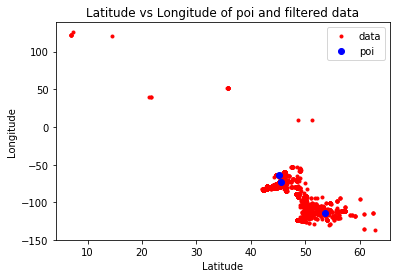

In [60]:
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Latitude vs Longitude of poi and filtered data")
#plt.axis([40, 55, -125, -50])
plt.legend(["data", "poi"])

for pt in geo_data:
    geo1, = plt.plot(pt["Latitude"], pt["Longitude"], 'r.', label="data")
    
for pt in geo_poi:
    geo2, = plt.plot(pt[" Latitude"], pt["Longitude"], 'bo', label="poi")
    
plt.legend(handles=[geo1, geo2])
plt.show()

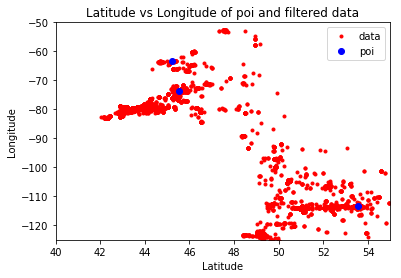

In [61]:
# the above plot shows results with outliers so the visualization is too large!
# the second plot shows a more expanded view of the data around each point

plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Latitude vs Longitude of poi and filtered data")
plt.axis([40, 55, -125, -50])
plt.legend(["data", "poi"])

for pt in geo_data:
    geo1, = plt.plot(pt["Latitude"], pt["Longitude"], 'r.', label="data")
    
for pt in geo_poi:
    geo2, = plt.plot(pt[" Latitude"], pt["Longitude"], 'bo', label="poi")
    
plt.legend(handles=[geo1, geo2])
plt.show()

In [62]:
# obtaining data to connect each poi
poi_full = df_todict(filtered_poilist, filtered_poilist.columns)
data_poi = df_todict(df_combine_poi, ["Latitude", "Longitude", "closest_poi"])

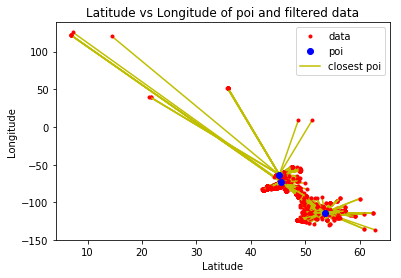

In [67]:
# full map of all the data and poi

plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Latitude vs Longitude of poi and filtered data")
#plt.axis([40, 55, -125, -50])
plt.legend(["data", "poi"])

for pt in poi_full:
    for data in data_poi:
        
        if pt["POIID"] == data["closest_poi"]:
            ptx = [data["Latitude"], pt[" Latitude"]]
            pty = [data["Longitude"], pt["Longitude"]]
            
            geo3, = plt.plot(ptx, pty, 'y-', label="closest poi")
            geo1, = plt.plot(data["Latitude"], data["Longitude"], 'r.', label="data")
    
    geo2, = plt.plot(pt[" Latitude"], pt["Longitude"], 'bo', label="poi")
    
plt.legend(handles=[geo1, geo2, geo3])
plt.show()

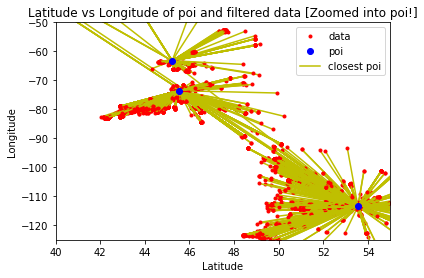

In [68]:
# full map of all the data and poi
# the map is zoomed in to get a better visualization since certain points (possible outliers?) cause the map to be stretched

plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Latitude vs Longitude of poi and filtered data [Zoomed into poi!]")
plt.axis([40, 55, -125, -50])
plt.legend(["data", "poi"])

for pt in poi_full:
    for data in data_poi:
        
        if pt["POIID"] == data["closest_poi"]:
            ptx = [data["Latitude"], pt[" Latitude"]]
            pty = [data["Longitude"], pt["Longitude"]]
            
            geo3, = plt.plot(ptx, pty, 'y-', label="closest poi")
            geo1, = plt.plot(data["Latitude"], data["Longitude"], 'r.', label="data")
    
    geo2, = plt.plot(pt[" Latitude"], pt["Longitude"], 'bo', label="poi")
    
plt.legend(handles=[geo1, geo2, geo3])
plt.show()

In [118]:
set_of_max = dict() # gets the maximum distance of each poi to form a radius and resulting circle
set_density = dict() # calculates each poi respective density (no_of_requests / area of circle)
plot_radius = dict() # collects the radius for each poi (based on the map)

distance_data = df_todict(df_combine_poi, ["Latitude", "Longitude", "closest_poi", "distance_poi"])

for pt in poi_full:
    poi_max = 0
    dense = 0
    
    for data in distance_data:
        if pt["POIID"] == data["closest_poi"]:
            if data["distance_poi"] > poi_max:
                poi_max = data["distance_poi"]
                lat_max = data["Latitude"]
                long_max = data["Longitude"]
                
    # set the maximum distance from the poi
    set_of_max[pt["POIID"]] = poi_max
    
    # density = no_of_requests / area_of_circle
    area = np.pi * (poi_max ** 2)
    dense = no_points[pt["POIID"]] / area
    set_density[pt["POIID"]] = dense
    
    # radius between center (poi) to edge of circle (max point)
    # since this is a 2d map, distance is measured as x, y coordinates and not harvestine formula (to calculate lat/long dist)
    dis = (np.sqrt(((pt[" Latitude"] - lat_max) ** 2) + ((pt["Longitude"] - long_max) ** 2)))
    plot_radius[pt["POIID"]] = dis
    
set_of_max, set_density, plot_radius

({'POI1': 11535.44092941355,
  'POI4': 9352.507811382198,
  'POI3': 1475.043866113338},
 {'POI1': 2.3268085125691765e-05,
  'POI4': 1.7358506130103752e-06,
  'POI3': 0.001432995068376566},
 {'POI1': 240.08129435825484,
  'POI4': 106.38557007548393,
  'POI3': 19.155364028809714})

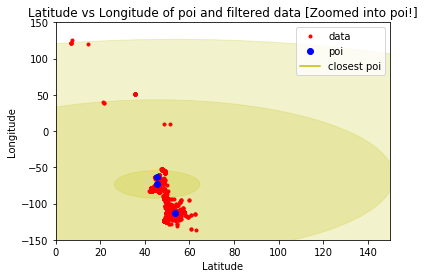

In [121]:
# full map of all the data and poi with circle over the poi
# using the zoomed in map

fig, ax = plt.subplots()
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Latitude vs Longitude of poi and filtered data [Zoomed into poi!]")
plt.legend(["data", "poi"])

plt.axis([0, 150, -150, 150])
for pt in poi_full:
    for data in data_poi:
        
        if pt["POIID"] == data["closest_poi"]:
            ptx = [data["Latitude"], pt[" Latitude"]]
            pty = [data["Longitude"], pt["Longitude"]]
            
            #geo3, = plt.plot(ptx, pty, 'y-', label="closest poi")
            geo1, = plt.plot(data["Latitude"], data["Longitude"], 'r.', label="data")
    
    geo2, = plt.plot(pt[" Latitude"], pt["Longitude"], 'bo', label="poi")
    #plt.scatter(pt[" Latitude"], pt["Longitude"], s=plot_radius[pt["POIID"]]*400, c="yellow", alpha=0.4)
    circle1 = plt.Circle((pt[" Latitude"], pt["Longitude"]), radius=plot_radius[pt["POIID"]], color='y', alpha=0.2)
    ax.add_artist(circle1)

plt.legend(handles=[geo1, geo2, geo3])
plt.show()